# 使用advs来生成线图

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline


advs = pd.read_sas("./ADaM/advs.xpt")


In [2]:
advs1 = advs.loc[(advs["ANL01FL"] == b"Y") & (advs["PARAM"] == b'Diastolic Blood Pressure (mmHg)')]
gg = advs1.groupby(["TRTPN","TRTP","AVISITN","AVISIT"])

In [3]:
advs1.head()


,STUDYID,SITEID,USUBJID,AGE,AGEGR1,AGEGR1N,RACE,RACEN,SEX,SAFFL,...,AVAL,BASE,BASETYPE,CHG,PCHG,VISITNUM,VISIT,VSSEQ,ANL01FL,ABLFL
2,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,56.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',5.397605e-79,5.397605e-79,3.0,b'BASELINE',7.0,b'Y',b'Y'
4,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,56.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',5.397605e-79,5.397605e-79,4.0,b'WEEK 2',13.0,b'Y',b''
5,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,64.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',8.000000e+00,1.428571e+01,5.0,b'WEEK 4',16.0,b'Y',b''
7,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,55.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',-1.000000e+00,-1.785714e+00,7.0,b'WEEK 6',22.0,b'Y',b''
8,b'CDISCPILOT01',b'701',b'01-701-1015',63.0,b'<65',1.0,b'WHITE',1.0,b'F',b'Y',...,67.0,56.0,b'AFTER LYING DOWN FOR 5 MINUTES',1.100000e+01,1.964286e+01,8.0,b'WEEK 8',25.0,b'Y',b''


In [4]:
gg["PARAM"].value_counts()

TRTPN         TRTP                     AVISITN       AVISIT               PARAM                             
5.397605e-79  b'Placebo'               5.397605e-79  b'Baseline'          b'Diastolic Blood Pressure (mmHg)'    255
                                       2.000000e+00  b'Week 2'            b'Diastolic Blood Pressure (mmHg)'    252
                                       4.000000e+00  b'Week 4'            b'Diastolic Blood Pressure (mmHg)'    246
                                       6.000000e+00  b'Week 6'            b'Diastolic Blood Pressure (mmHg)'    228
                                       8.000000e+00  b'Week 8'            b'Diastolic Blood Pressure (mmHg)'    219
                                       1.200000e+01  b'Week 12'           b'Diastolic Blood Pressure (mmHg)'    207
                                       1.600000e+01  b'Week 16'           b'Diastolic Blood Pressure (mmHg)'    204
                                       2.000000e+01  b'Week 20'           b'Dia

In [14]:
# sum = gg["AVAL"].agg({"Mean":"mean","SE":"sem"})  ## there are warning for this method.
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

sum = gg["AVAL"].agg({"mean","sem"})

In [16]:
list(sum)

['sem', 'mean']

In [17]:
sum.columns = ["Mean","SE"]

In [18]:
sum

Mean  \
TRTPN        TRTP                    AVISITN      AVISIT                          
5.397605e-79 b'Placebo'              5.397605e-79 b'Baseline'          0.683195   
                                     2.000000e+00 b'Week 2'            0.656637   
                                     4.000000e+00 b'Week 4'            0.730596   
                                     6.000000e+00 b'Week 6'            0.675795   
                                     8.000000e+00 b'Week 8'            0.627666   
                                     1.200000e+01 b'Week 12'           0.758959   
                                     1.600000e+01 b'Week 16'           0.777397   
                                     2.000000e+01 b'Week 20'           0.751718   
                                     2.400000e+01 b'Week 24'           0.889480   
                                     2.600000e+01 b'Week 26'           0.829744   
                                     9.900000e+01 b'End of Treatment'  0.704194   
5.400000e+01 b'Xanomeline Low Dose'  5.397605e-79 b'Baseline'          0.645753   
                                     2.000000e+00 b'Week 2'            0.624276   
                                     4.000000e+00 b'Week 4'            0.636105   
                                     6.000000e+00 b'Week 6'            0.657279   
                                     8.000000e+00 b'Week 8'            0.801326   
                                     1.200000e+01 b'Week 12'           0.867584   
                                     1.600000e+01 b'Week 16'           0.902284   
                                     2.000000e+01 b'Week 20'           1.026247   
                                     2.400000e+01 b'Week 24'           1.084361   
                                     2.600000e+01 b'Week 26'           1.142132   
                                     9.900000e+01 b'End of Treatment'  0.620944   
8.100000e+01 b'Xanomeline High Dose' 5.397605e-79 b'Baseline'          0.646967   
                                     2.000000e+00 b'Week 2'            0.691378   
                                     4.000000e+00 b'Week 4'            0.647355   
                                     6.000000e+00 b'Week 6'            0.694820   
                                     8.000000e+00 b'Week 8'            0.716300   
                                     1.200000e+01 b'Week 12'           0.752202   
                                     1.600000e+01 b'Week 16'           0.865336   
                                     2.000000e+01 b'Week 20'           1.056854   
                                     2.400000e+01 b'Week 24'           1.079002   
                                     2.600000e+01 b'Week 26'           1.147899   
                                     9.900000e+01 b'End of Treatment'  0.701510   

                                                                              SE  
TRTPN        TRTP                    AVISITN      AVISIT                          
5.397605e-79 b'Placebo'              5.397605e-79 b'Baseline'          77.094118  
                                     2.000000e+00 b'Week 2'            74.456349  
                                     4.000000e+00 b'Week 4'            75.430894  
                                     6.000000e+00 b'Week 6'            74.482456  
                                     8.000000e+00 b'Week 8'            75.246575  
                                     1.200000e+01 b'Week 12'           74.289855  
                                     1.600000e+01 b'Week 16'           75.117647  
                                     2.000000e+01 b'Week 20'           73.398990  
                                     2.400000e+01 b'Week 24'           73.796610  
                                     2.600000e+01 b'Week 26'           72.632184  
                                     9.900000e+01 b'End of Treatment'  74.056911  
5.400000e+01 b'Xanomeline Low Dose'  5.397605e-79 b'Baseline'          76.357143  
       

In [19]:
sum.reset_index()
sum.sort_values(by=["AVISITN","AVISIT","TRTPN","TRTP"])

,,,,Mean,SE
TRTPN,TRTP,AVISITN,AVISIT,,
5.397605e-79,b'Placebo',5.397605e-79,b'Baseline',0.683195,77.094118
5.400000e+01,b'Xanomeline Low Dose',5.397605e-79,b'Baseline',0.645753,76.357143
8.100000e+01,b'Xanomeline High Dose',5.397605e-79,b'Baseline',0.646967,78.265873
5.397605e-79,b'Placebo',2.000000e+00,b'Week 2',0.656637,74.456349
5.400000e+01,b'Xanomeline Low Dose',2.000000e+00,b'Week 2',0.624276,76.219124
8.100000e+01,b'Xanomeline High Dose',2.000000e+00,b'Week 2',0.691378,76.427984
5.397605e-79,b'Placebo',4.000000e+00,b'Week 4',0.730596,75.430894
5.400000e+01,b'Xanomeline Low Dose',4.000000e+00,b'Week 4',0.636105,76.004630
8.100000e+01,b'Xanomeline High Dose',4.000000e+00,b'Week 4',0.647355,76.799087


In [7]:
sum.reset_index(inplace=True)
sum["ybar_upper"] = sum["Mean"] + sum["SE"]
sum["ybar_lower"] = sum["Mean"] - sum["SE"]

In [8]:
list(sum)

['TRTPN',
 'TRTP',
 'AVISITN',
 'AVISIT',
 'Mean',
 'SE',
 'ybar_upper',
 'ybar_lower']

In [9]:
sum

,TRTPN,TRTP,AVISITN,AVISIT,Mean,SE,ybar_upper,ybar_lower
0,5.397605e-79,b'Placebo',5.397605e-79,b'Baseline',77.094118,0.683195,77.777313,76.410923
1,5.397605e-79,b'Placebo',2.000000e+00,b'Week 2',74.456349,0.656637,75.112986,73.799712
2,5.397605e-79,b'Placebo',4.000000e+00,b'Week 4',75.430894,0.730596,76.161490,74.700299
3,5.397605e-79,b'Placebo',6.000000e+00,b'Week 6',74.482456,0.675795,75.158251,73.806661
4,5.397605e-79,b'Placebo',8.000000e+00,b'Week 8',75.246575,0.627666,75.874242,74.618909
5,5.397605e-79,b'Placebo',1.200000e+01,b'Week 12',74.289855,0.758959,75.048814,73.530896
6,5.397605e-79,b'Placebo',1.600000e+01,b'Week 16',75.117647,0.777397,75.895044,74.340250
7,5.397605e-79,b'Placebo',2.000000e+01,b'Week 20',73.398990,0.751718,74.150707,72.647272
8,5.397605e-79,b'Placebo',2.400000e+01,b'Week 24',73.796610,0.889480,74.686090,72.907130
9,5.397605e-79,b'Placebo',2.600000e+01,b'Week 26',72.632184,0.829744,73.461928,71.802440


In [10]:
avisitn = advs["AVISITN"].value_counts().reset_index(name="counts")
list(avisitn)
type(avisitn)
avisitn.sort_values(by=["index"])
avisitn_sorted = avisitn["index"].tolist()

In [11]:
avisitn_sorted

[5.397605346934028e-79, 2.0, 99.0, 4.0, 6.0, 8.0, 12.0, 16.0, 20.0, 24.0, 26.0]

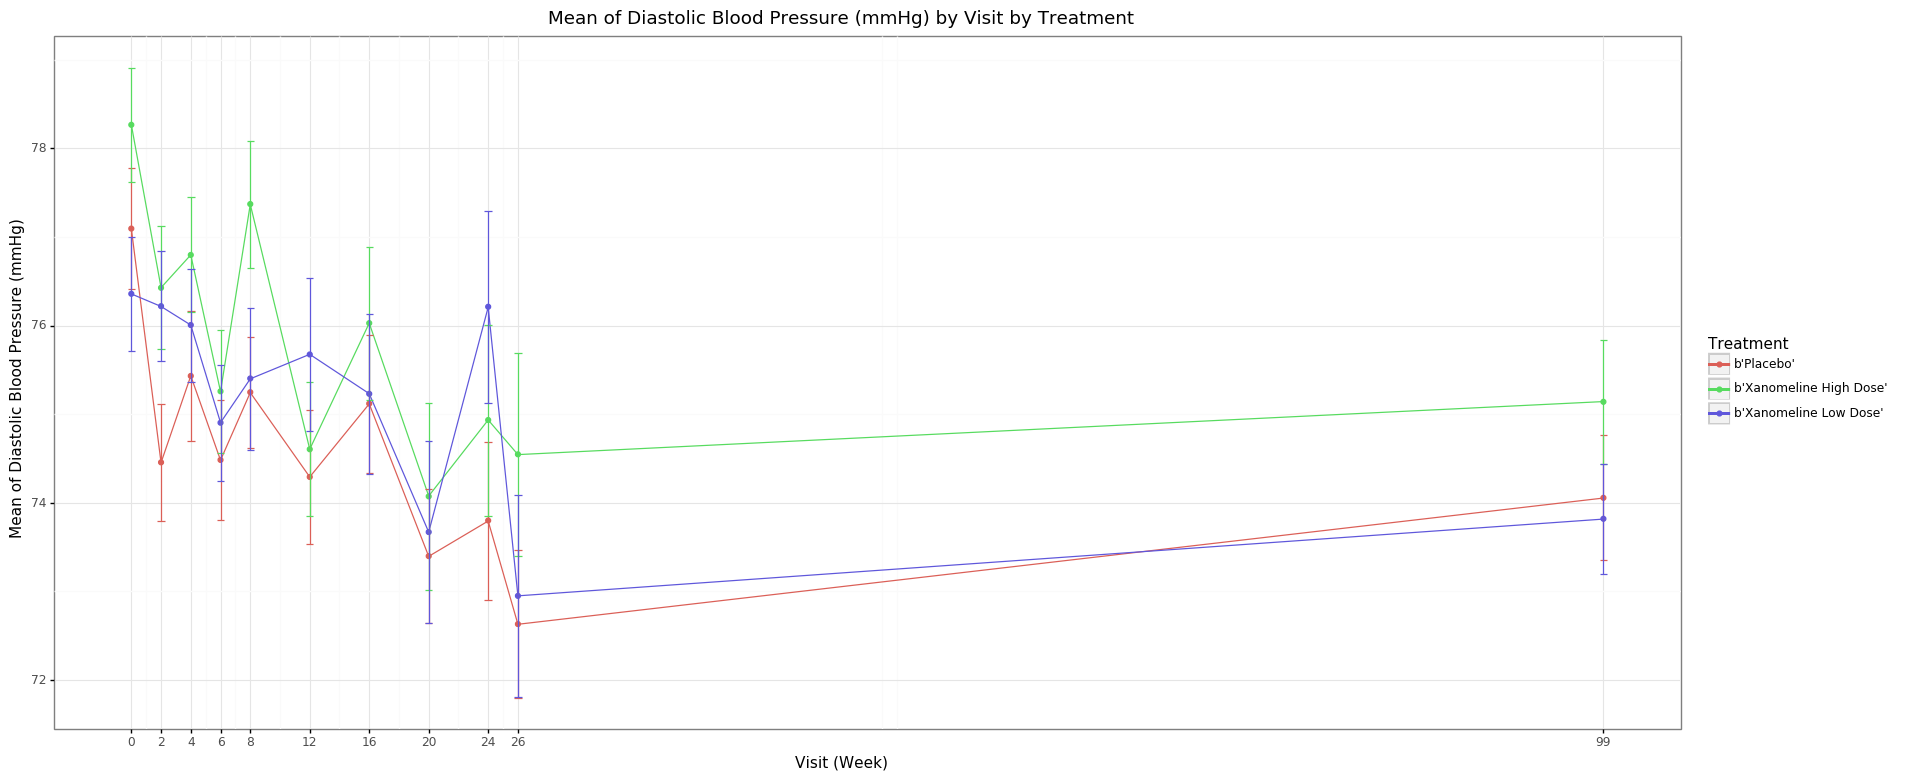

<ggplot: (-9223363251771113454)>

In [12]:
(ggplot(sum, aes("AVISITN","Mean",color="factor(TRTP)"))
 + geom_point(position="jitter")
 + geom_line(position="jitter")
 + geom_errorbar(aes(ymin="ybar_lower",ymax="ybar_upper"))
 + xlab("Visit (Week)")
 + ylab("Mean of Diastolic Blood Pressure (mmHg)")
 + ggtitle("Mean of Diastolic Blood Pressure (mmHg) by Visit by Treatment")
 + scale_x_continuous(breaks=avisitn_sorted)
 + theme_bw()
 + labs(color="Treatment")
 + theme(legend_position="right",figure_size=(21,9))
)

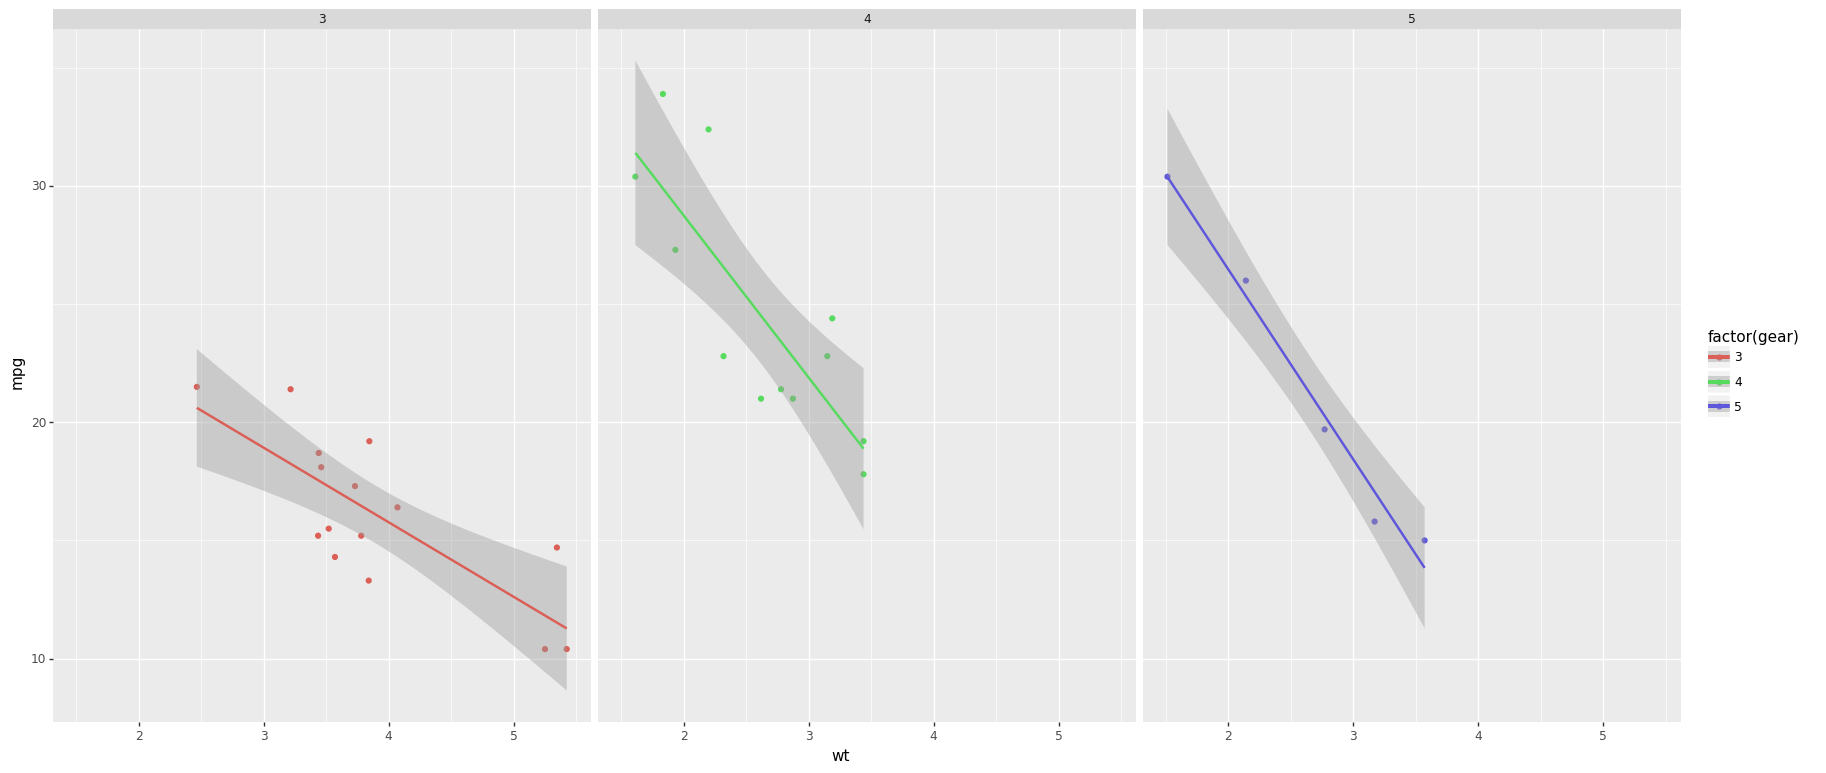

<ggplot: (8785083662582)>

In [21]:
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + theme(legend_position="right",figure_size=(21,9))
 + facet_wrap('~gear'))